In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

sys.path.append("..")
sys.path.append("../protein_transformer")
sns.set_style("whitegrid")

In [2]:
# results from the run train01
train_path = Path("../runs/train01")

In [3]:
# train and valid loss
train_df = pd.read_csv(train_path / "results.csv")
train_df.head()

,Epoch,train_loss,val_loss,val_accuracy,val_auc,val_precision,val_recall,val_f1
0,1,0.690,0.676,0.655,0.787,0.753,0.655,0.621
1,2,0.678,0.664,0.673,0.795,0.690,0.673,0.667
2,3,0.666,0.654,0.655,0.823,0.717,0.655,0.625
3,4,0.664,0.648,0.673,0.806,0.731,0.673,0.648
4,5,0.658,0.642,0.655,0.817,0.717,0.655,0.625


Text(0, 0.5, 'Loss')

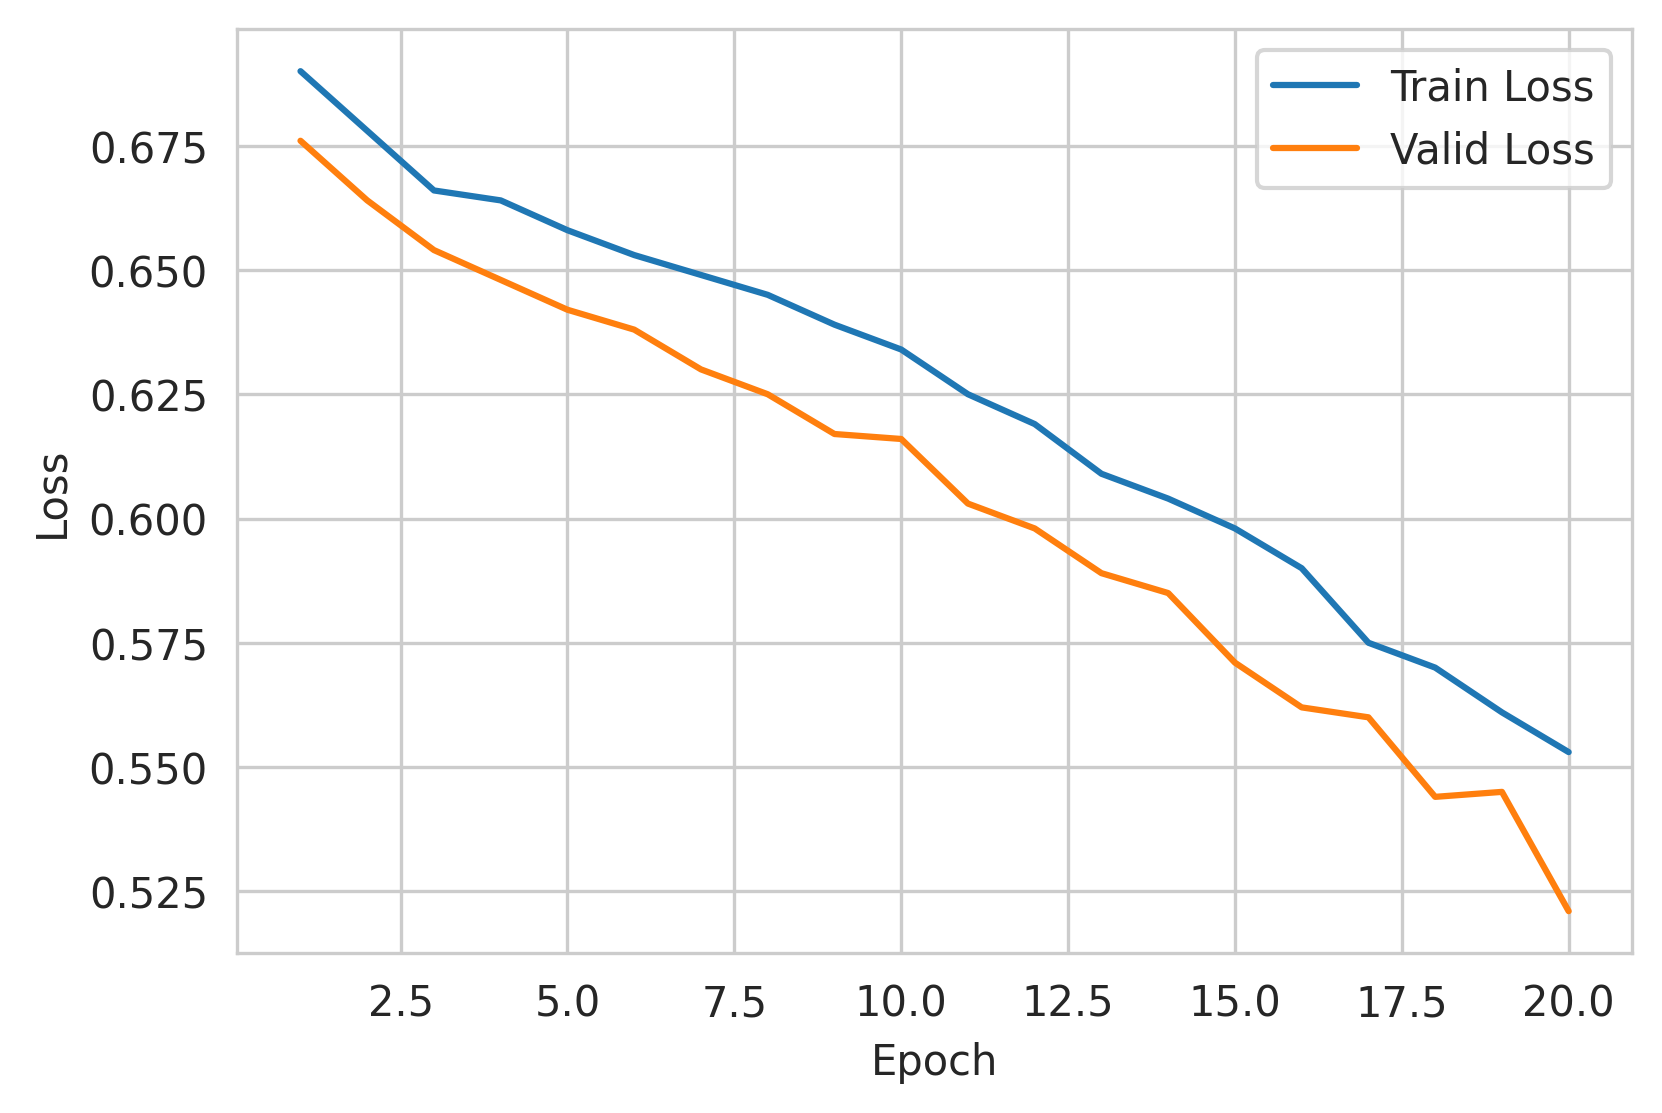

In [4]:
fig = plt.figure(figsize=(6, 4), dpi=300)
sns.lineplot(data=train_df, x="Epoch", y="train_loss", label="Train Loss")
sns.lineplot(data=train_df, x="Epoch", y="val_loss", label="Valid Loss")
plt.ylabel("Loss")

In [16]:
from protein_transformer.evaluate import evaluate
from sklearn.metrics import RocCurveDisplay, auc

In [17]:
y_true, y_pred, y_prob, metrics = evaluate(
    run_dir="../runs/tune01", dataset_loc="../data/bcr_test.parquet"
)

[Text(0.5, 0, 'False Positive Rate'),
 Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 1.0, 'ROC Curve for Antibody Classifier on the Hold-Out Test Set')]

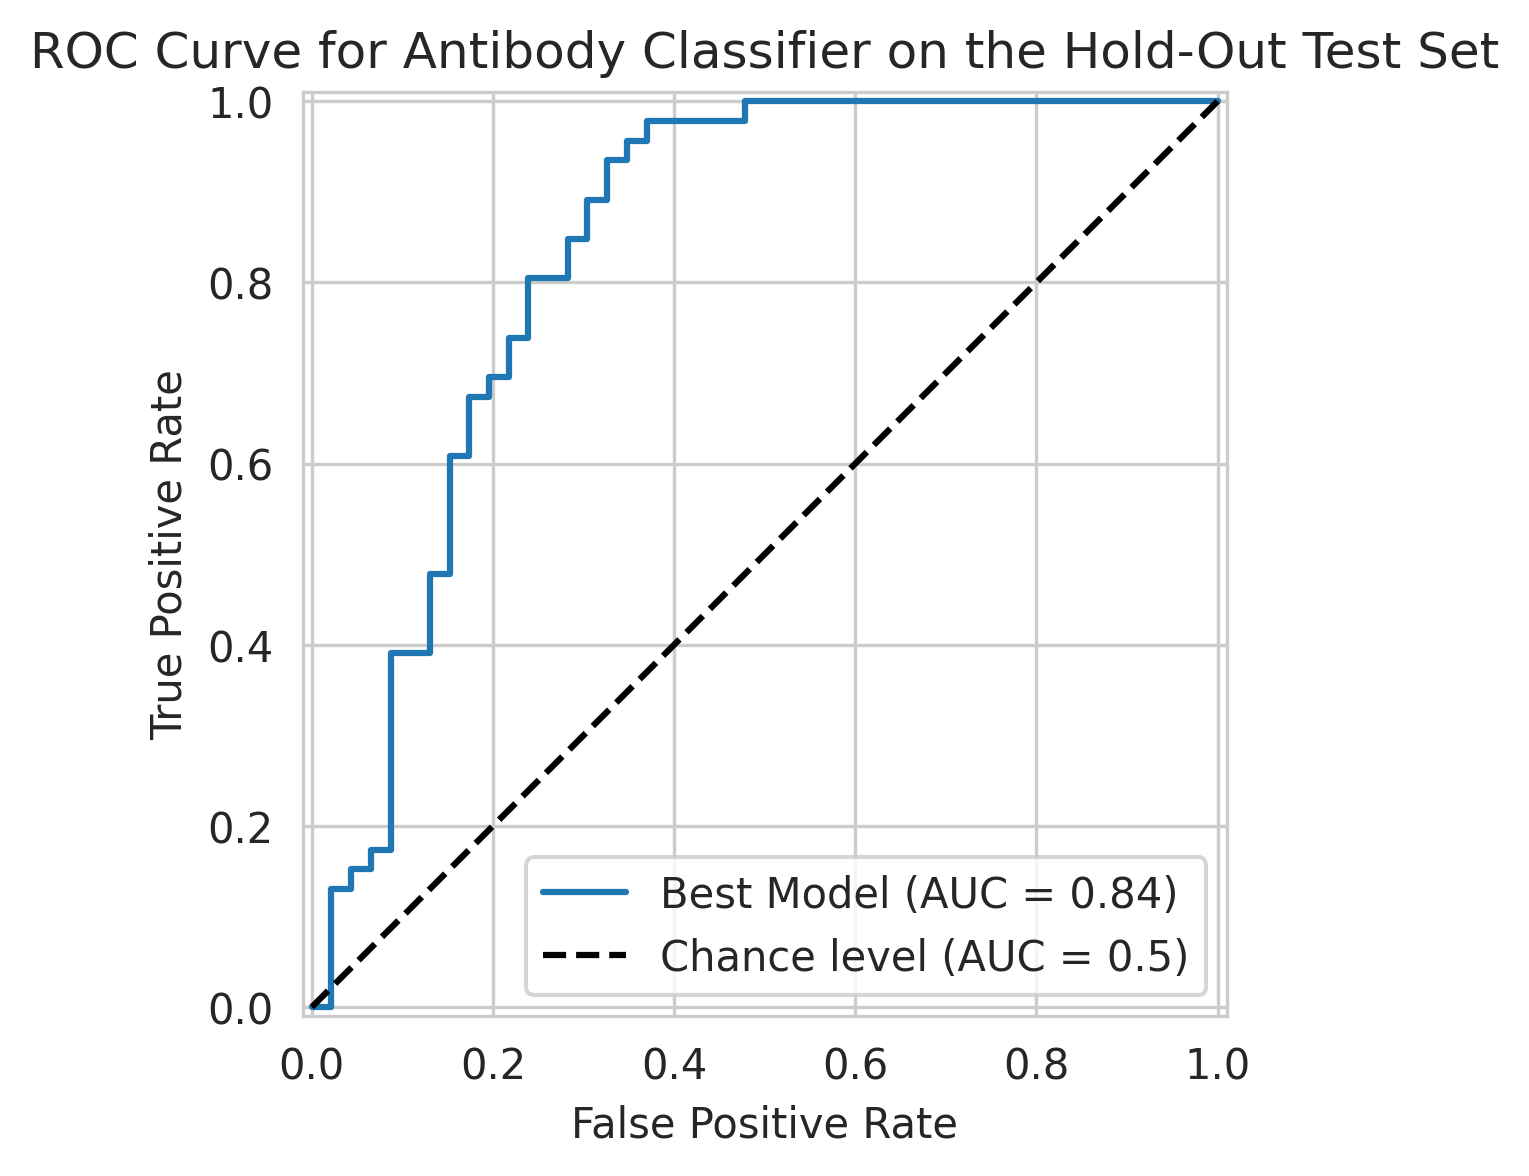

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
display = RocCurveDisplay.from_predictions(
    y_true, y_prob[:, 1], name="Best Model", plot_chance_level=True, ax=ax
)
display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve for Antibody Classifier on the Hold-Out Test Set",
)

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

sns.set_style("white")

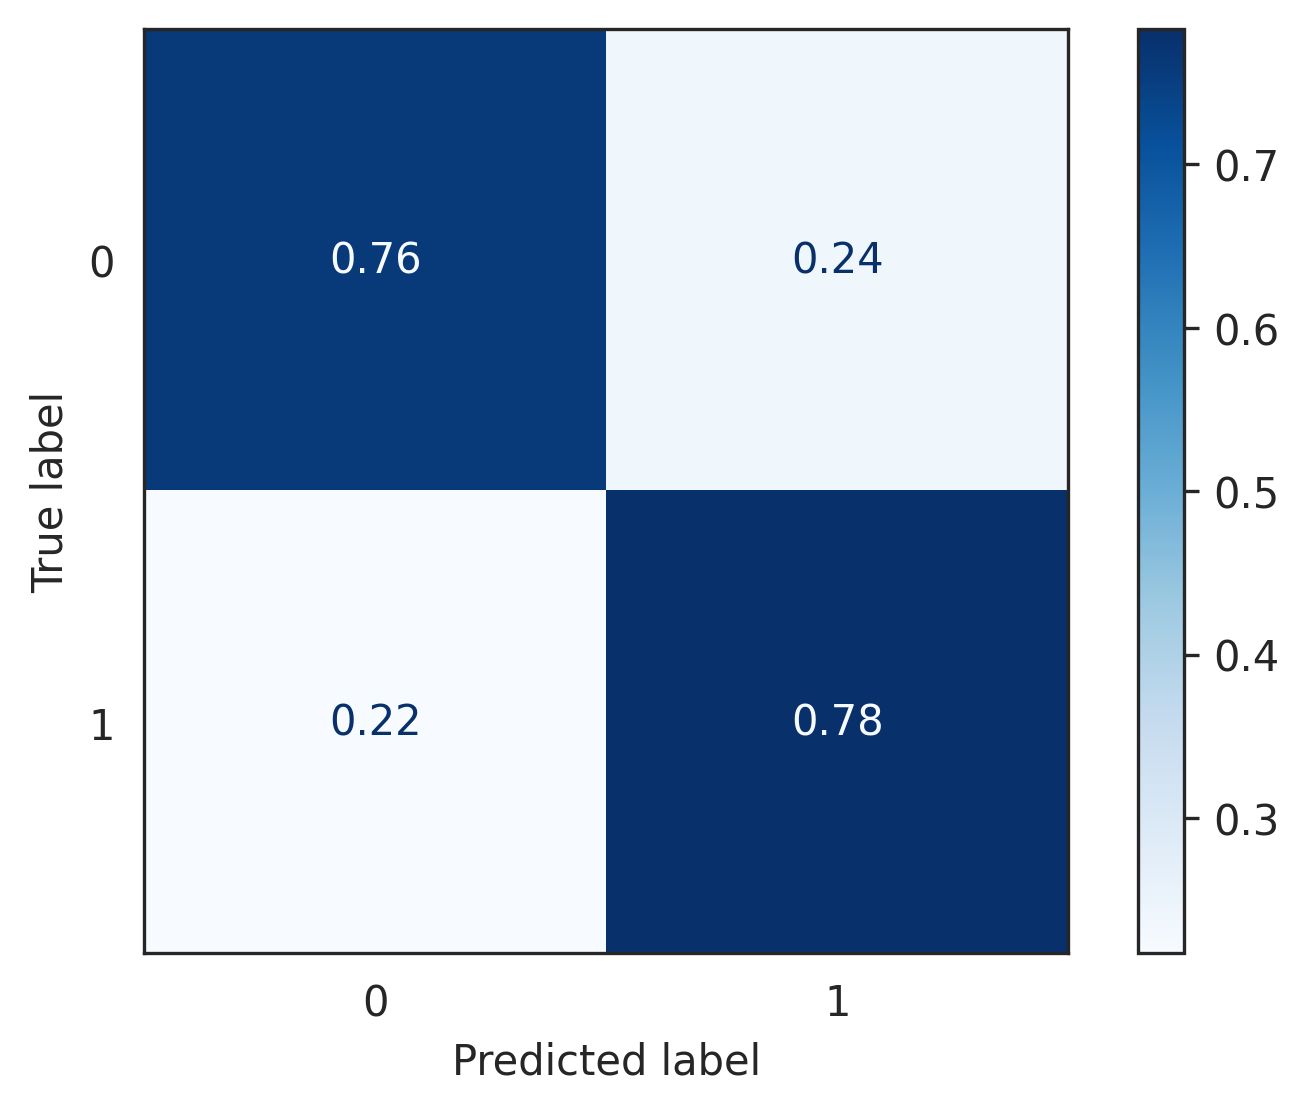

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, cmap=plt.cm.Blues, normalize="true", ax=ax
)